# **Transforming Education: Insights from Predictive Models, Scholarship Predictions, and Academic Risk Assessment**

**Library and Module Imports**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.neural_network import MLPClassifier

**Binary Classification of Student Categories using Logistic Regression, FNN, and CNN**

In [ ]:
# Load labeled dataset
df = pd.read_csv('/content/Grades - Grades.csv')

# Define the list of SGPA column names (all semesters)
sgpa_columns = ['sgpa_s1', 'sgpa_s2', 'sgpa_s3', 'sgpa_s4', 'sgpa_s5', 'sgpa_s6']

# Split the data into a training set and a testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

# Select the SGPA columns as features (all semesters)
X = df[sgpa_columns]

# Encode the target variable 'Student_Category'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Student_Category '])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Feedforward Neural Network (FNN)
model1 = keras.Sequential([
    keras.layers.Dense(32, input_dim=X_train.shape[1], activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model 1
model1.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Model 2: Multi-Layer Perceptron (MLP)
model2 = keras.Sequential([
    keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model 2
model2.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

fnn_loss, fnn_accuracy = model1.evaluate(X_test, y_test)
print("FNN Test Loss:", fnn_loss)
print("FNN Test Accuracy:", fnn_accuracy)

mlp_loss, mlp_accuracy = model2.evaluate(X_test, y_test)
print("MLP Test Loss:", mlp_loss)
print("MLP Test Accuracy:", mlp_accuracy)


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Epoch 1/50
1/1 [==============================] - 1s 897ms/step - loss: 2.3796 - accuracy: 0.4000 - val_loss: 2.3695 - val_accuracy: 0.3333
Epoch 2/50
1/1 [==============================] - 0s 42ms/step - loss: 2.2208 - accuracy: 0.4000 - val_loss: 2.2011 - val_accuracy: 0.3333
Epoch 3/50
1/1 [==============================] - 0s 59ms/step - loss: 2.0651 - accuracy: 0.4000 - val_loss: 2.0362 - val_accuracy: 0.3333
Epoch 4/50
1/1 [==============================] - 0s 56ms/step - loss: 1.9132 - accuracy: 0.4000 - val_loss: 1.8700 - val_accuracy: 0.3333
Epoch 5/50
1/1 [==============================] - 0s 40ms/step - loss: 1.7665

**Student Risk Prediction using Logistic Regression, FNN, and CNNn**

In [ ]:
# Load and preprocess the dataset
data = pd.read_csv('/content/Grades - Grades.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# Load and preprocess the dataset
data = pd.read_csv('Grades - Grades.csv')

# Assuming we have 'Risky' as your target column
X = data[['sgpa_s1', 'cgpa_s1', 'sgpa_s2', 'cgpa_s2', 'sgpa_s3', 'cgpa_s3', 'sgpa_s4', 'cgpa_s4', 'sgpa_s5', 'cgpa_s5', 'sgpa_s6', 'cgpa_s6']]
y = data['Risky']

# Encode the labels as integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Feedforward Neural Network (FNN)
fnn_model = Sequential()
fnn_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
fnn_model.add(Dense(32, activation='relu'))
fnn_model.add(Dense(1, activation='sigmoid'))  # Use sigmoid activation for binary classification
fnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
fnn_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Build a Multi-Layer Perceptron (MLP) as the second model
mlp_model = Sequential()
mlp_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
mlp_model.add(Dense(32, activation='relu'))
mlp_model.add(Dense(1, activation='sigmoid'))  # Use sigmoid activation for binary classification
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate both models on the test set
fnn_loss, fnn_accuracy = fnn_model.evaluate(X_test, y_test, verbose=0)
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)

print("FNN Test Accuracy:", fnn_accuracy)
print("MLP Test Accuracy:", mlp_accuracy)

Logistic Regression Accuracy: 1.0
Epoch 1/20
1/1 [==============================] - 1s 833ms/step - loss: 0.9082 - accuracy: 0.1500
Epoch 2/20
1/1 [==============================] - 0s 19ms/step - loss: 0.6263 - accuracy: 0.8500
Epoch 3/20
1/1 [==============================] - 0s 12ms/step - loss: 0.4570 - accuracy: 0.8500
Epoch 4/20
1/1 [==============================] - 0s 13ms/step - loss: 0.3824 - accuracy: 0.8500
Epoch 5/20
1/1 [==============================] - 0s 12ms/step - loss: 0.3651 - accuracy: 0.8500
Epoch 6/20
1/1 [==============================] - 0s 11ms/step - loss: 0.3742 - accuracy: 0.8500
Epoch 7/20
1/1 [==============================] - 0s 12ms/step - loss: 0.3900 - accuracy: 0.8500
Epoch 8/20
1/1 [==============================] - 0s 13ms/step - loss: 0.4052 - accuracy: 0.8500
Epoch 9/20
1/1 [==============================] - 0s 12ms/step - loss: 0.4159 - accuracy: 0.8500
Epoch 10/20
1/1 [==============================] - 0s 13ms/step - loss: 0.4215 - accuracy: 0

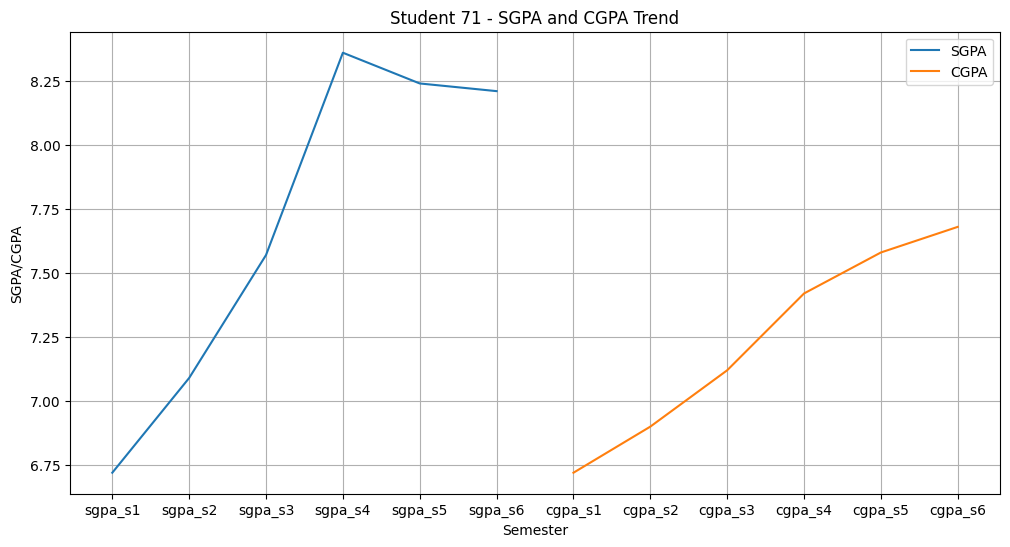

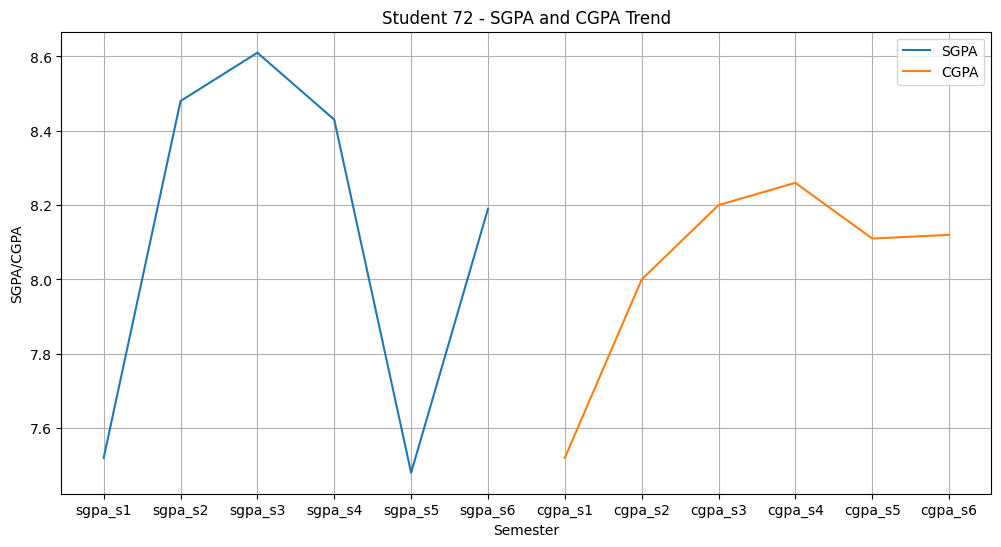

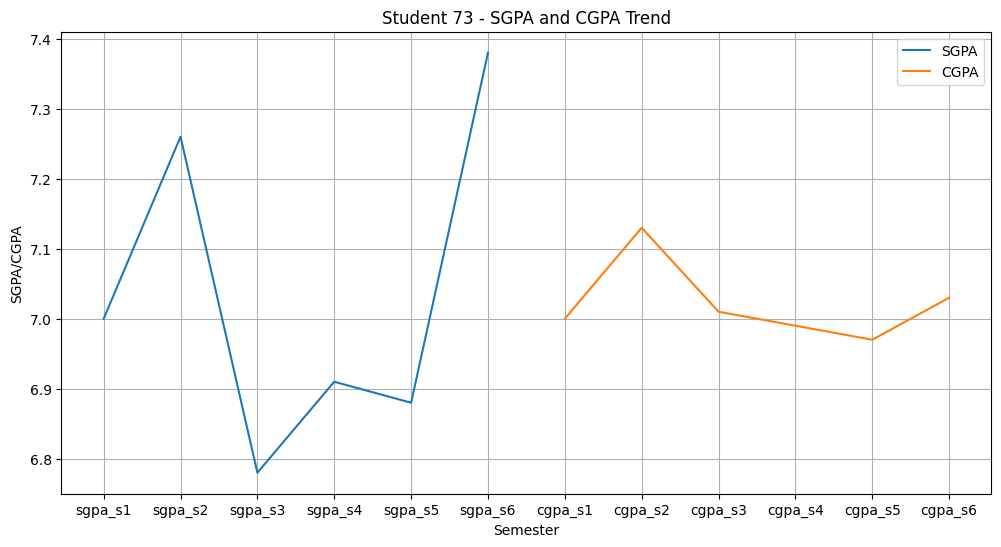

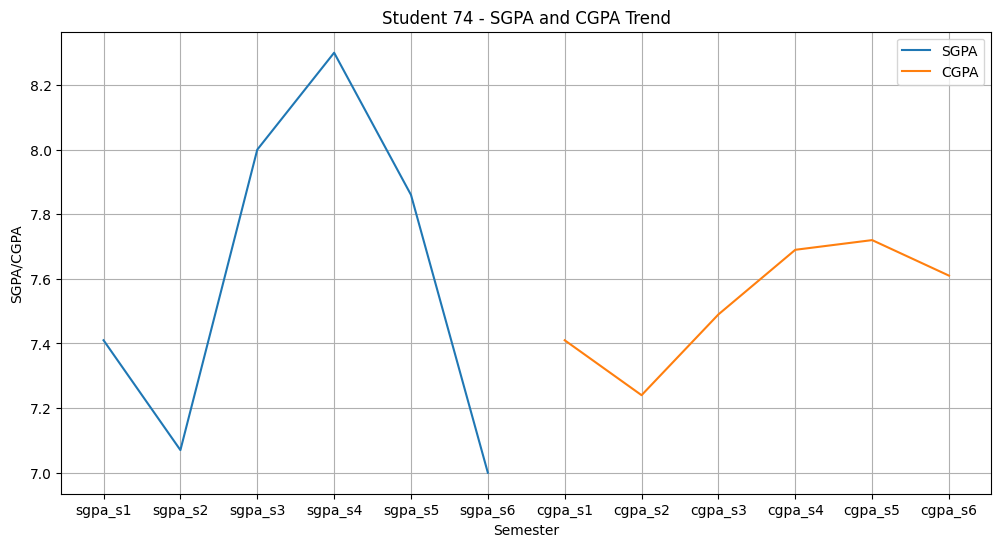

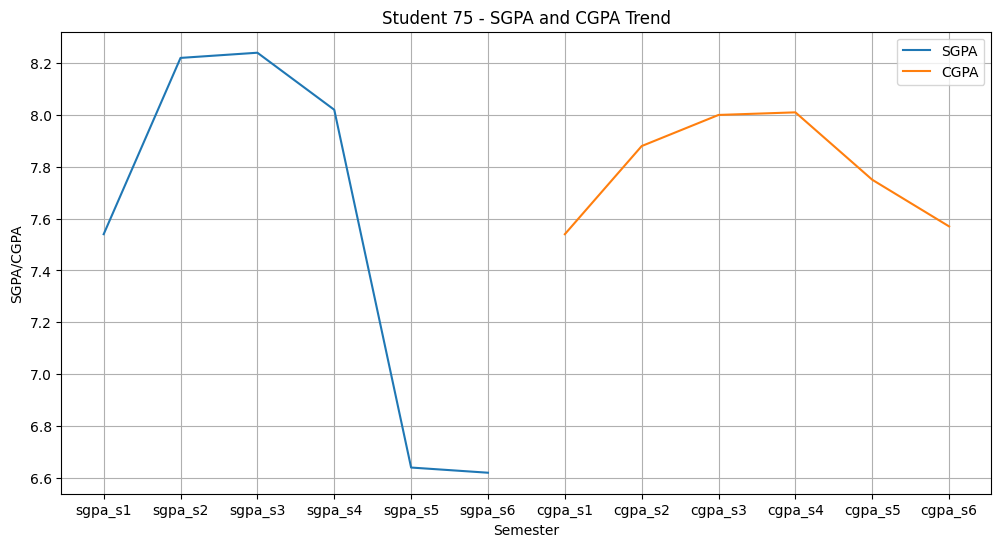

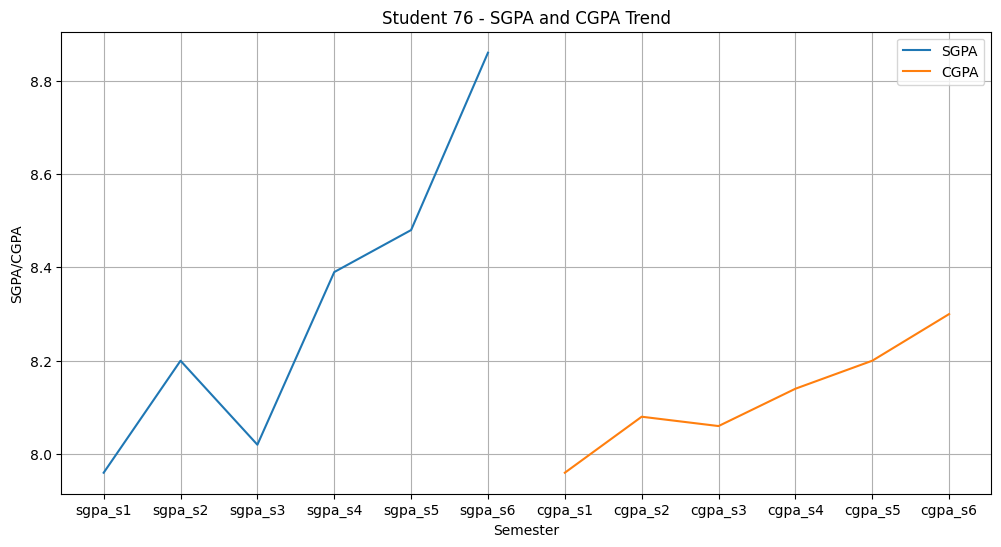

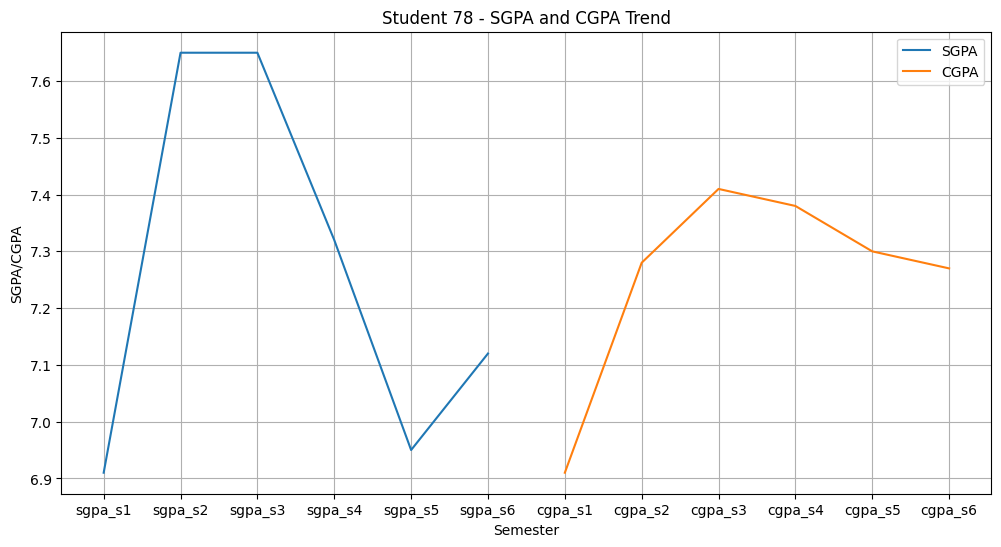

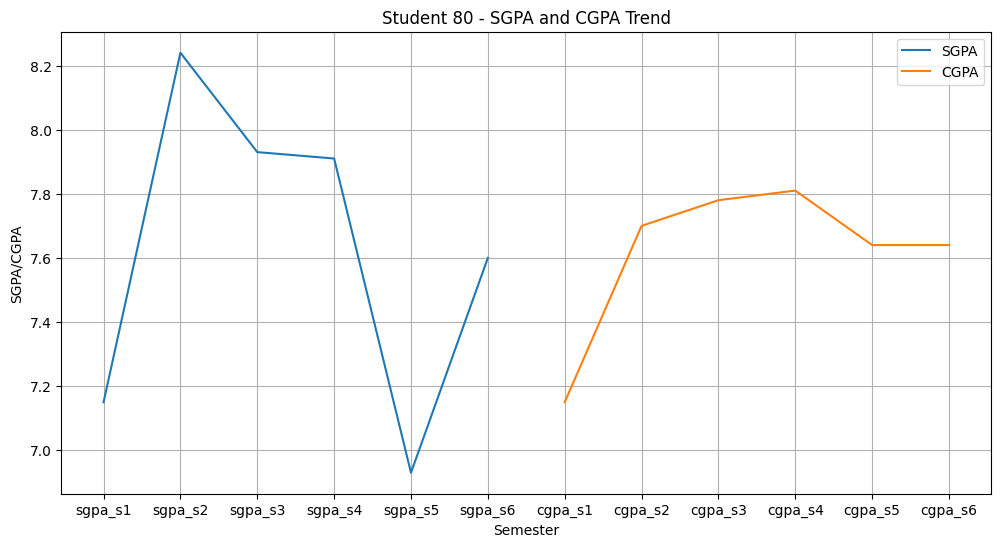

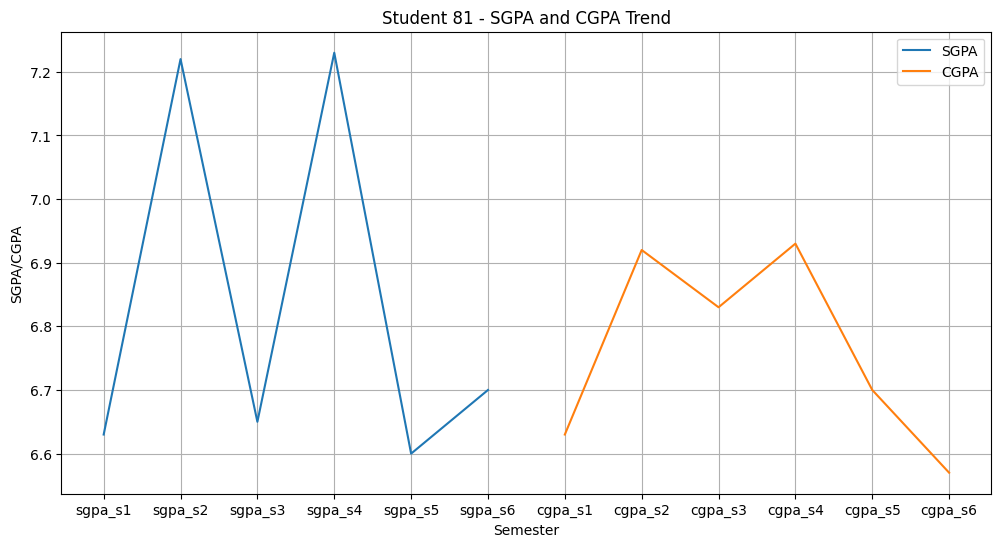

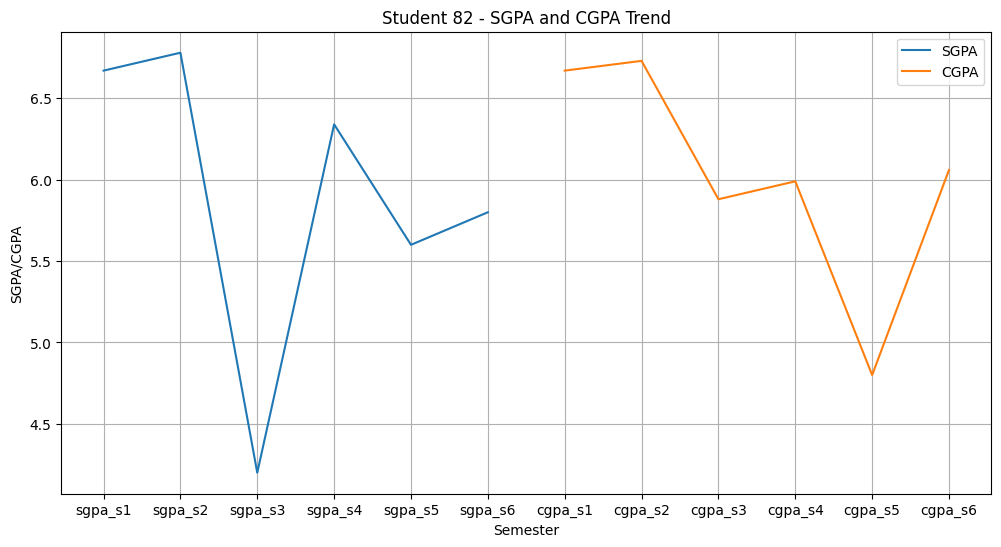

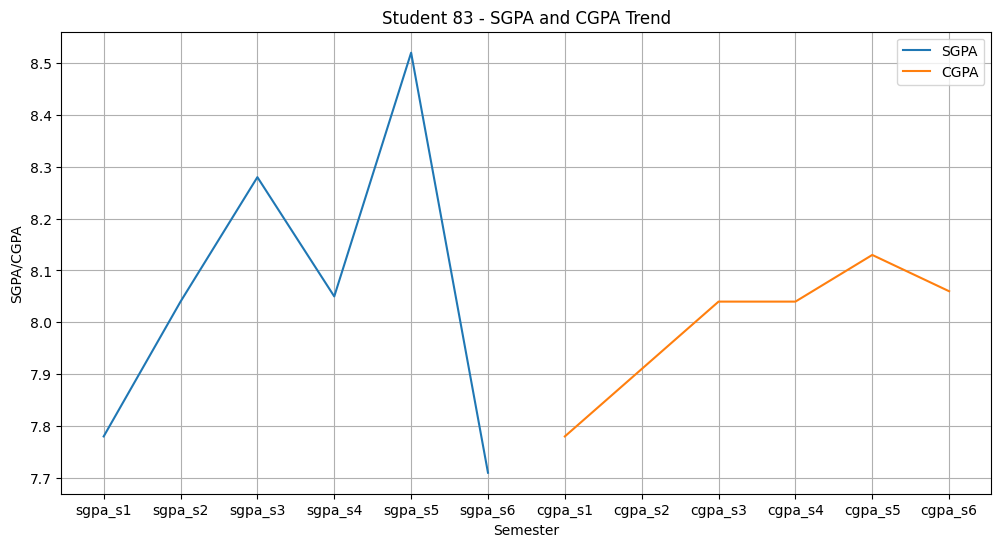

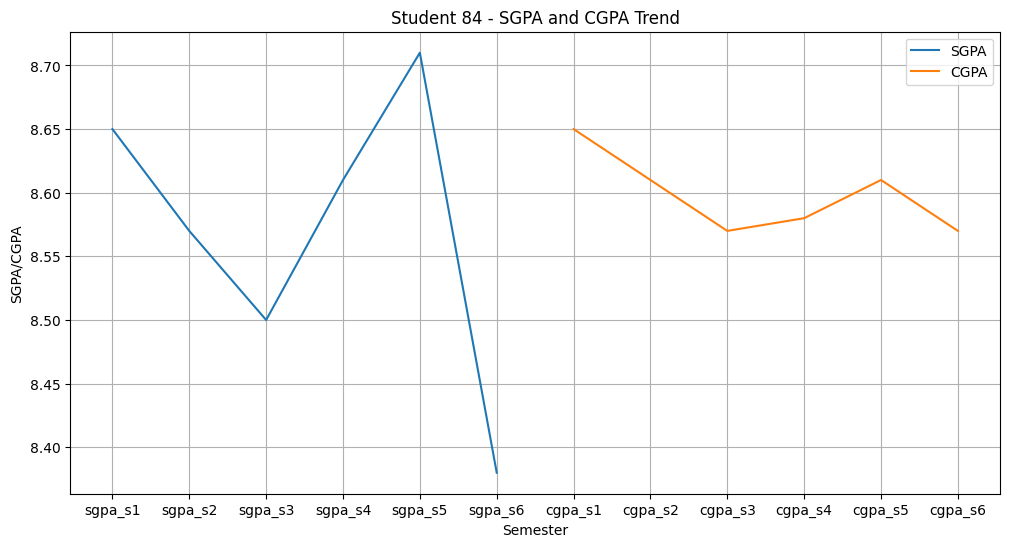

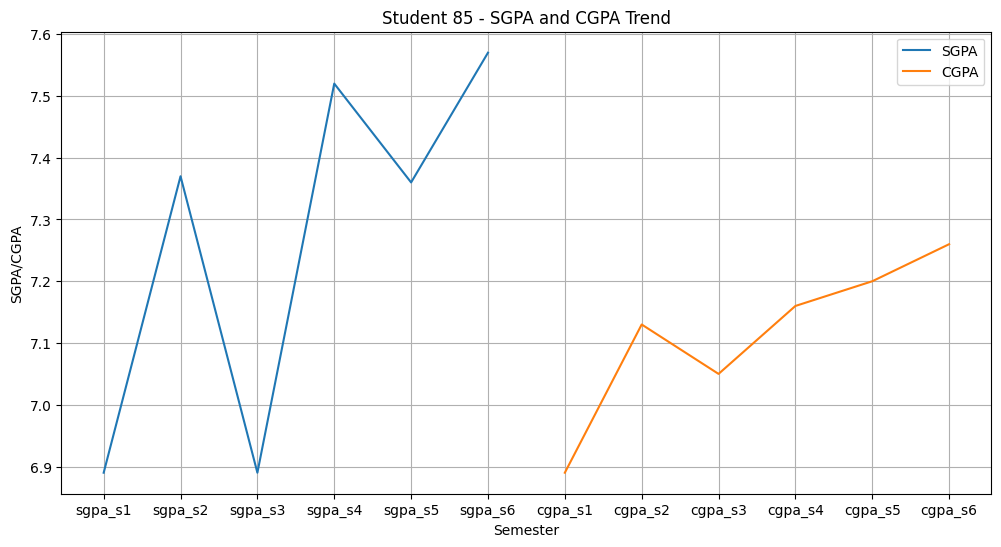

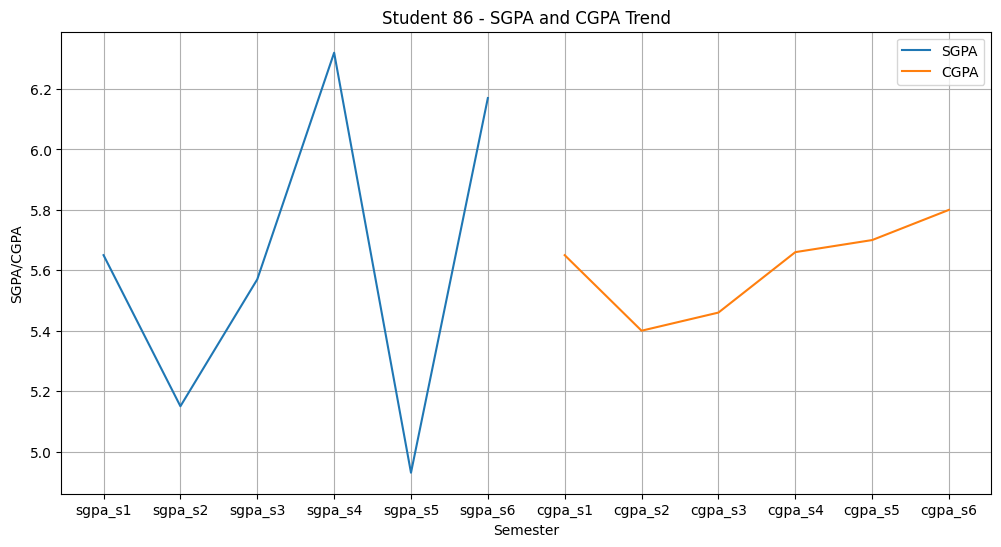

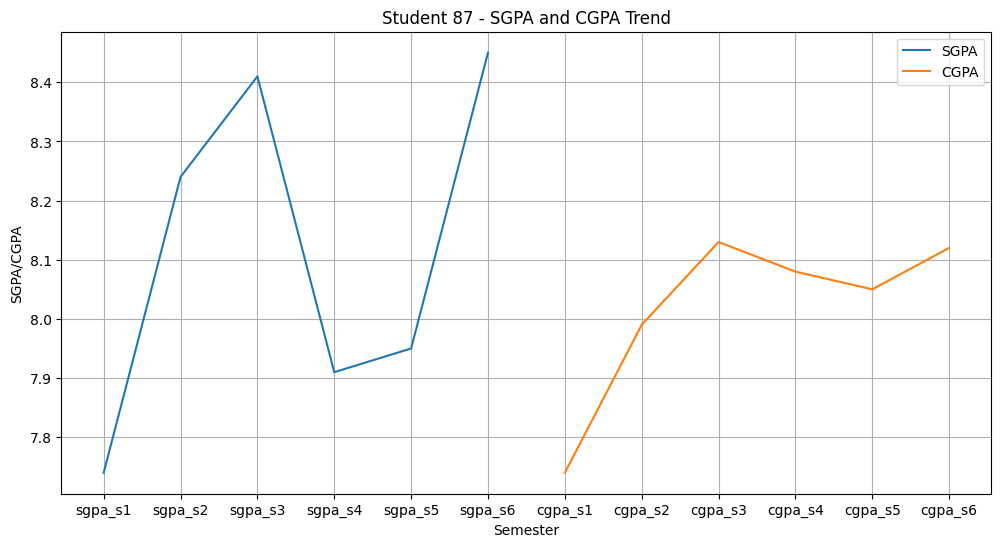

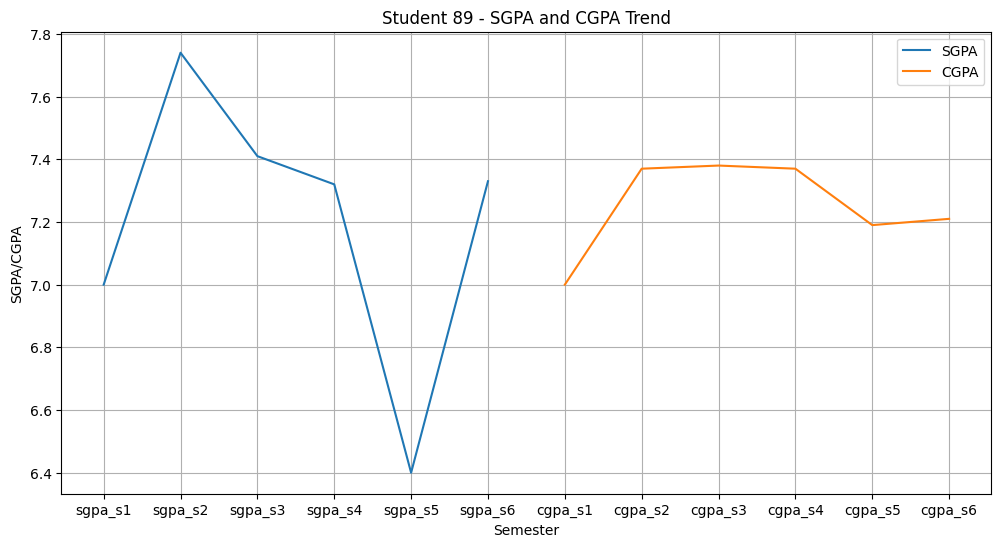

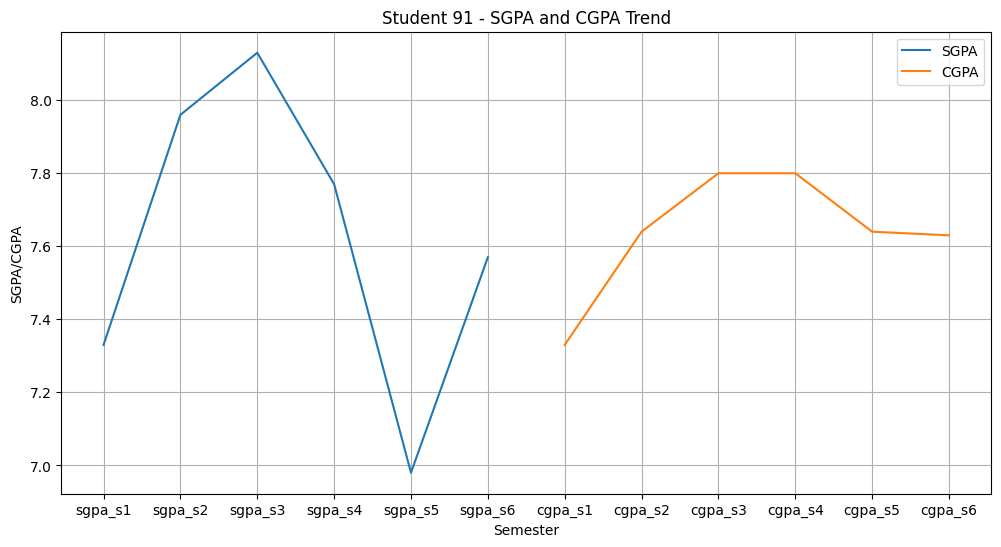

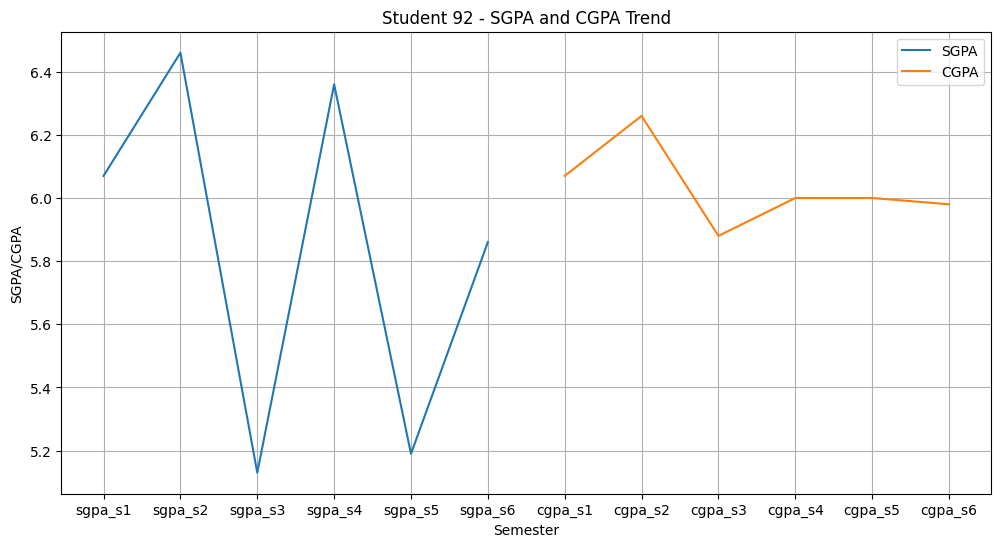

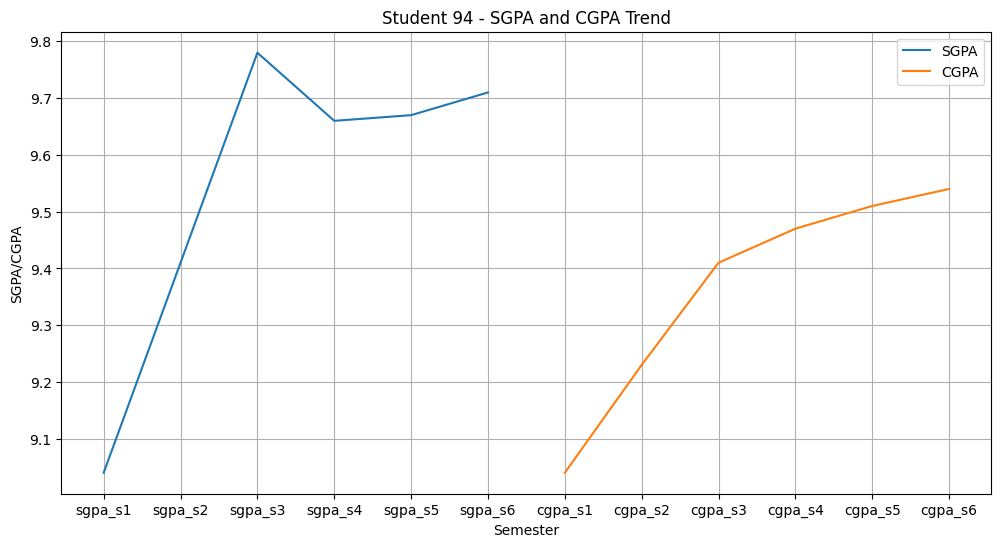

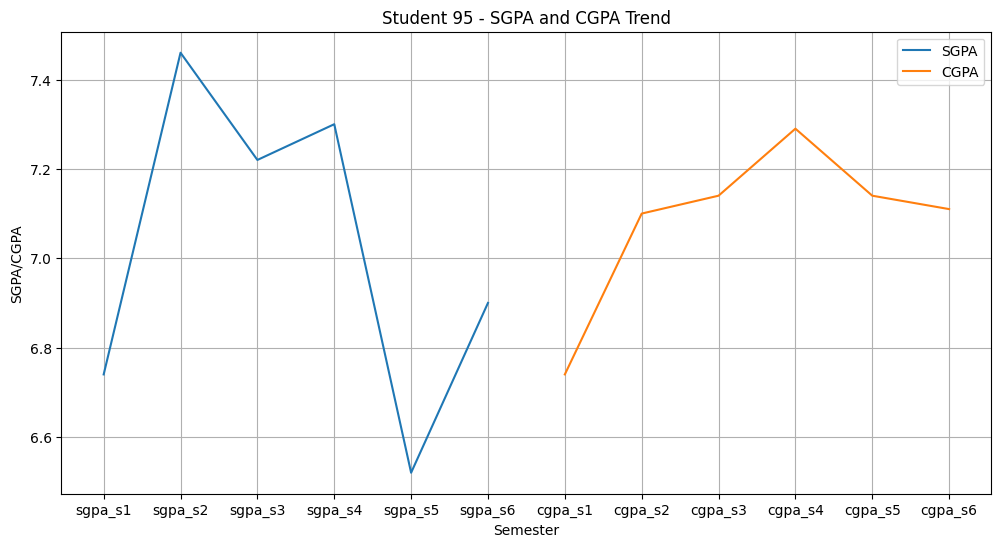

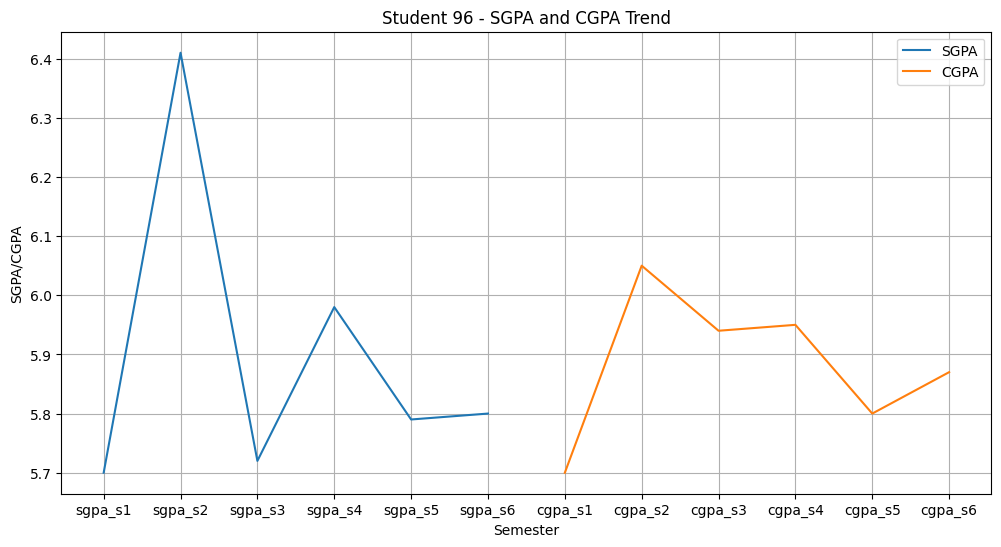

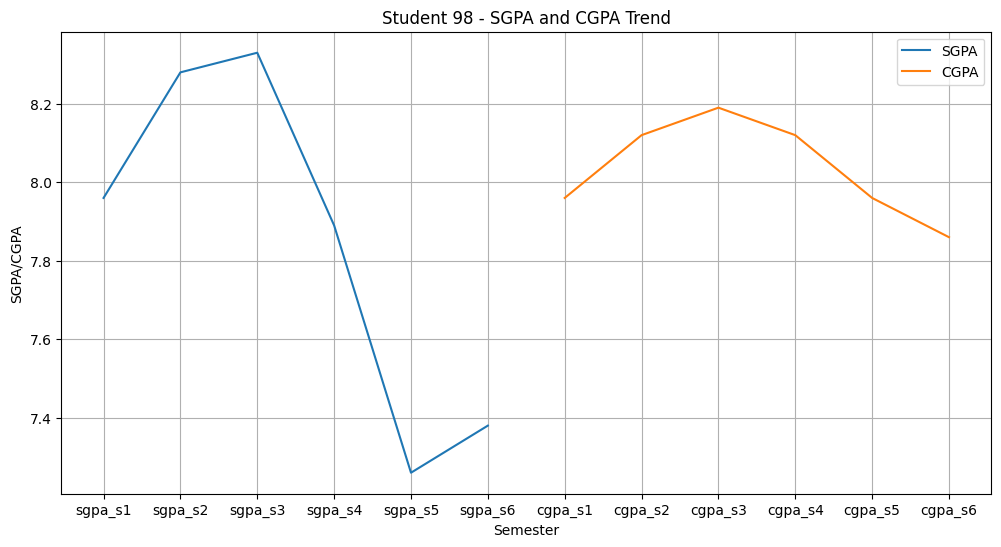

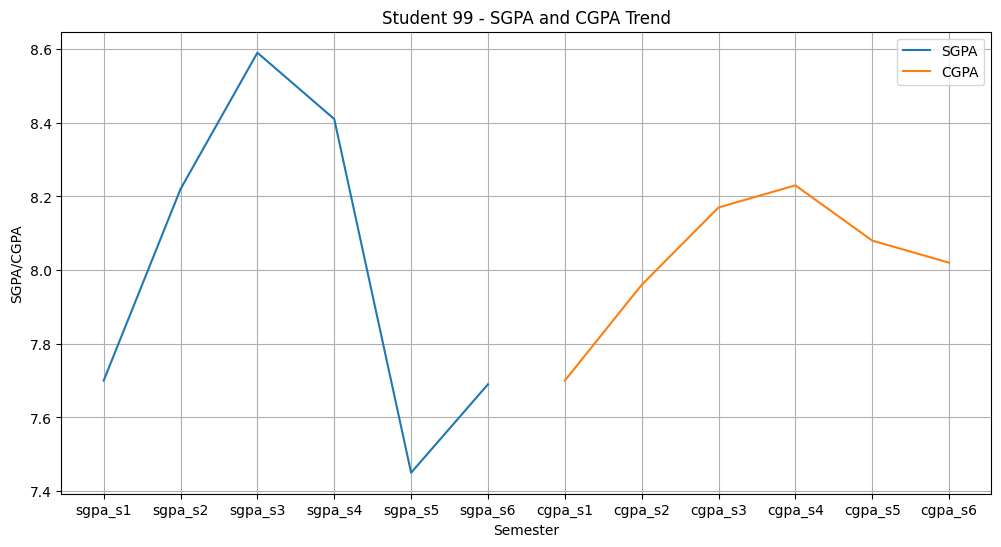

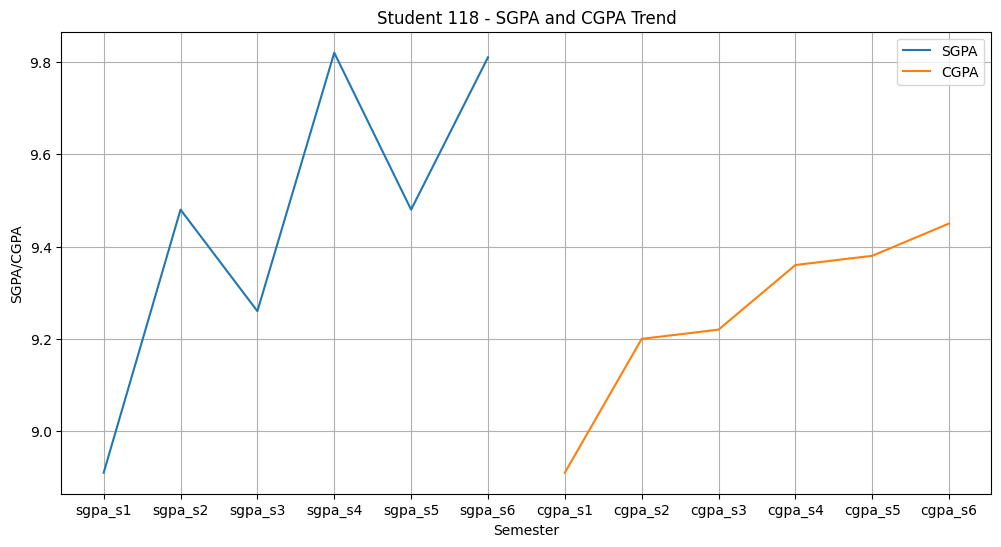

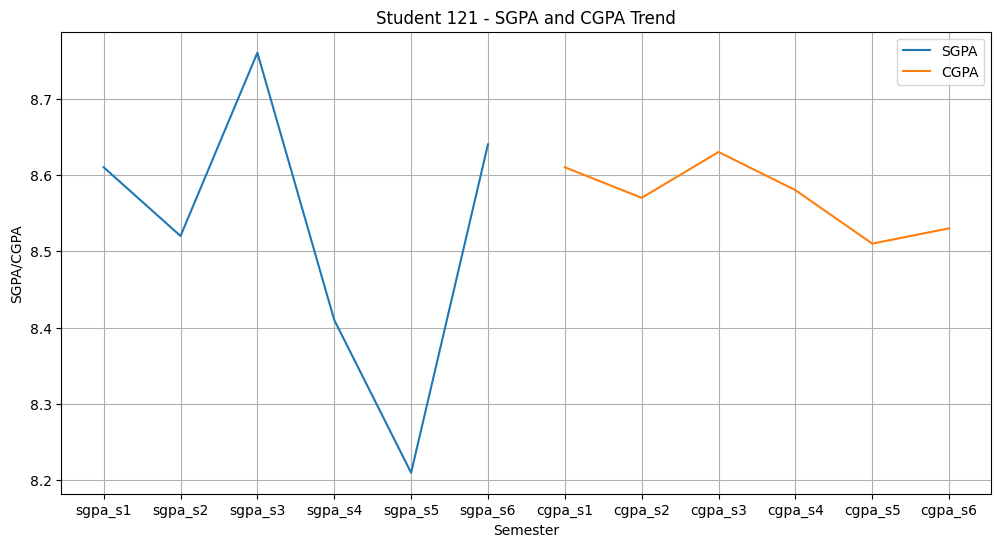

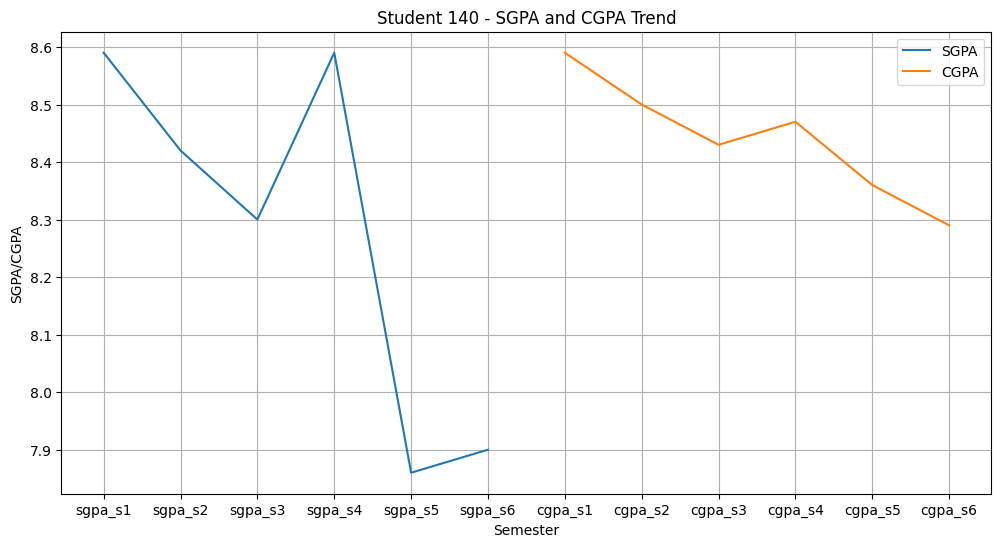

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/content/Grades - Grades.csv')
# 'Roll_Number' as the index column:
data.set_index('Roll_Number', inplace=True)

# Iterate through each student's data and create a trend graph.
for roll_number, student_data in data.iterrows():
    plt.figure(figsize=(12, 6))
    plt.plot(student_data[['sgpa_s1', 'sgpa_s2', 'sgpa_s3', 'sgpa_s4', 'sgpa_s5', 'sgpa_s6']], label='SGPA')
    plt.plot(student_data[['cgpa_s1', 'cgpa_s2', 'cgpa_s3', 'cgpa_s4', 'cgpa_s5', 'cgpa_s6']], label='CGPA')
    plt.title(f"Student {roll_number} - SGPA and CGPA Trend")
    plt.xlabel('Semester')
    plt.ylabel('SGPA/CGPA')
    plt.legend()
    plt.grid(True)
    plt.show()